# Training Models
This notebook contains code for chapter 4 of book *Hands on Machine Learning*.

## Linear Regression Algorithms

### Normal Equation
Here we will be using Normal equation to find best parameters for a training set that we will generate with line equation $y = 3x + 4$ along with addition of noise to it.
And then we will compare how well the normal equation perform with that of Scikit Learn Linear Regression. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Producing Synthetic Data!

Notice the addition of noise to y in form of uniform values between 0 to 1

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

Let's plot the data!

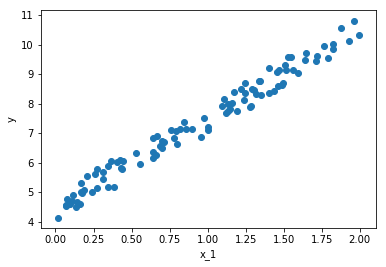

In [3]:
plt.scatter(X[:, 0], y[:, 0])
plt.xlabel('x_1')
plt.ylabel('y')
plt.show()

Applying the Normal equation

$$\hat{\theta} = {X^T.X}^{-1}.{X^T.y}$$

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0=1 to each example
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.49208126],
       [3.02206766]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.49208126],
       [10.53621658]])

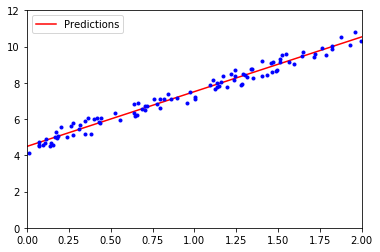

In [7]:
preds_label = plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 12])
plt.legend(loc="upper left")
plt.show()

Fitting same data to sklearn's LinearRegression object

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()

lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.49208126]), array([[3.02206766]]))

In [10]:
lin_reg.predict(X_new)

array([[ 4.49208126],
       [10.53621658]])

We get identical results!!

For drawback of this technique see notes of the chapter! In short its computation variates from $O(n^2.4)$ to $O(n^3)$ where *n* is number of features.

### Batch Gradient Descent
Gradient Descent is a powerful optimization technique that tweake parameters iteratively to find the optimum values of parameters that suit the given training set. For more details see notes!

In [11]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

In [12]:
theta = np.random.randn(2, 1) # random initialization

mse = lambda y, y_hat: np.mean((y_hat - y) ** 2)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if iteration % 20 == 0:
        print('{}/{} MSE:{}'.format(iteration, n_iterations, mse(y, X_b.dot(theta))))
print('Final MSE:', mse(y, X_b.dot(theta)))

0/1000 MSE:26.289060416645967
20/1000 MSE:0.17910107667103628
40/1000 MSE:0.10334997524712375
60/1000 MSE:0.08209598751819466
80/1000 MSE:0.07613261363291458
100/1000 MSE:0.07445942982622424
120/1000 MSE:0.07398997342372005
140/1000 MSE:0.07385825489227668
160/1000 MSE:0.07382129774048782
180/1000 MSE:0.07381092842454275
200/1000 MSE:0.07380801903602228
220/1000 MSE:0.07380720272937208
240/1000 MSE:0.07380697369274034
260/1000 MSE:0.07380690943039653
280/1000 MSE:0.07380689139987968
300/1000 MSE:0.07380688634093661
320/1000 MSE:0.07380688492151503
340/1000 MSE:0.07380688452325841
360/1000 MSE:0.07380688441151692
380/1000 MSE:0.07380688438016479
400/1000 MSE:0.0738068843713682
420/1000 MSE:0.07380688436890004
440/1000 MSE:0.07380688436820752
460/1000 MSE:0.07380688436801323
480/1000 MSE:0.07380688436795872
500/1000 MSE:0.07380688436794336
520/1000 MSE:0.0738068843679391
540/1000 MSE:0.07380688436793789
560/1000 MSE:0.07380688436793756
580/1000 MSE:0.07380688436793745
600/1000 MSE:0.0738

In [13]:
theta

array([[4.49208126],
       [3.02206766]])

**Learning Rate Comparison**

We will be using 3 learning rates for comparisons = 0.02, 0.1 and 0.5

In [14]:
etas = [0.02, 0.1, 0.5]
n_iterations = 1000
m = 100

In [15]:
thetas = []

for i, eta in enumerate(etas):
    thetas.append([np.random.randn(2, 1)])
    cur_theta = thetas[i][-1]
    print('Eta =', eta)
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(cur_theta) - y)
        cur_theta = cur_theta - eta * gradients
        if iteration % 20 == 0:
            thetas[i].append(cur_theta)

Eta = 0.02
Eta = 0.1
Eta = 0.5


In [16]:
thetas = np.array(thetas)
thetas.shape

(3, 51, 2, 1)

In [17]:
colors = np.random.rand(3, 3, thetas.shape[1] // 3)

colors.shape

(3, 3, 17)

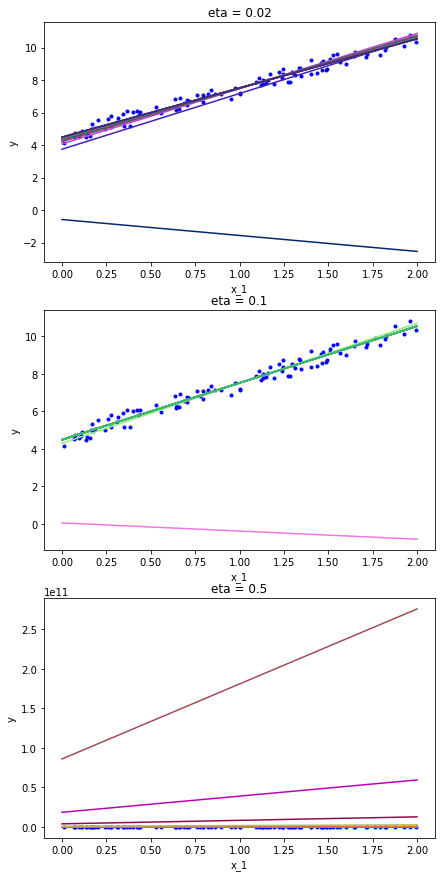

In [18]:
plt.figure(figsize=(7, 15))

for i in range(3):
    plt.subplot(3, 1, i+1)
    plt.plot(X, y, "b.")
    ctr = 0
    for j in range(0, thetas.shape[1], 3):
        plt.plot(X_new, X_new_b.dot(thetas[i, j]), color=list(colors[i, :, ctr]))
        ctr += 1
    plt.xlabel("x_1")
    plt.ylabel("y")
    plt.title("eta = " + str(etas[i]))
plt.show()

We see that the left one with $\eta=0.02$ takes many steps to reach the perfect mid position. The middle one with $\eta=0.1$ takes very few steps to reach the best fit line. On the other hand the right one with $\eta=0.5$ deviates from the best fit line. We can use GridSearch for find the best value of $\eta$

### Stochastic Gradient Descent
Batch Gradient descent has the drawback that it cannot scale with large number of training instances. Here SGD comes into play. It takes one random example at a time and take a gradient descent step.

In [19]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule parameters

In [20]:
def learning_schedule(t):
    return t0 / (t + t1)

In [21]:
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    print('Epoch{}/{}'.format(epoch + 1, n_epochs), end='\t')
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m  + i)
        theta = theta - eta * gradients
    print('Loss: {}'.format(mse(y, X_b.dot(theta))))

Epoch1/50	Loss: 0.1021641260808005
Epoch2/50	Loss: 0.07633003351870808
Epoch3/50	Loss: 0.0798690346355438
Epoch4/50	Loss: 0.07694958782508701
Epoch5/50	Loss: 0.07382644798787069
Epoch6/50	Loss: 0.07423826535203332
Epoch7/50	Loss: 0.07424509156291853
Epoch8/50	Loss: 0.0738312165504255
Epoch9/50	Loss: 0.07431507198663917
Epoch10/50	Loss: 0.07391378803984627
Epoch11/50	Loss: 0.07402967759990117
Epoch12/50	Loss: 0.07387835030926364
Epoch13/50	Loss: 0.07453723938416344
Epoch14/50	Loss: 0.07392376374185411
Epoch15/50	Loss: 0.07629548210741043
Epoch16/50	Loss: 0.07419563030486744
Epoch17/50	Loss: 0.07385259612819174
Epoch18/50	Loss: 0.07399941127511064
Epoch19/50	Loss: 0.07578763277652166
Epoch20/50	Loss: 0.0761893602234726
Epoch21/50	Loss: 0.07525888363233776
Epoch22/50	Loss: 0.07529955741403621
Epoch23/50	Loss: 0.07895817734850623
Epoch24/50	Loss: 0.0741821265830649
Epoch25/50	Loss: 0.07383501559870265
Epoch26/50	Loss: 0.07385383231661198
Epoch27/50	Loss: 0.07381703543862385
Epoch28/50	Loss

In [22]:
theta

array([[4.49299745],
       [3.02183673]])

**Comparing to SKLearn's `SGDRegressor`**

In [23]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.48285751]), array([3.01098312]))

By convention we iterate by rounds = *m* (no of training examples); each round is called an *epoch*. While Batch Gradient Descent iterated for 1000 times SGD iterates for 50 epochs to reach a compelling result.

### Mini-Batch Gradient Descent

In [25]:
n_epochs = 50
batch_size = 64

eta = 0.1

In [26]:
thetas_mgd = [np.random.randn(2, 1)]

for epoch in range(n_epochs):
    indices = np.random.permutation(m)
    print('Epoch {}/{}'.format(epoch+1, n_epochs), end='\t')
    for batch_start in range(0, m, batch_size):
        theta = thetas_mgd[-1]
        batch_indices = indices[batch_start:batch_start+batch_size]
        batch_X = X_b[batch_indices]
        batch_Y = y[batch_indices]

        gradients = 2 / batch_size * batch_X.T.dot(batch_X.dot(theta) - batch_Y)
        thetas_mgd.append(theta - eta * gradients)
    print('Loss: {}'.format(mse(y, X_b.dot(thetas_mgd[-1]))))

Epoch 1/50	Loss: 17.456440888721627
Epoch 2/50	Loss: 4.311255041044413
Epoch 3/50	Loss: 1.4854009961529469
Epoch 4/50	Loss: 0.8397617209722154
Epoch 5/50	Loss: 0.663114044725803
Epoch 6/50	Loss: 0.5809616582050808
Epoch 7/50	Loss: 0.5294835830478478
Epoch 8/50	Loss: 0.48557664738506373
Epoch 9/50	Loss: 0.4464624721026373
Epoch 10/50	Loss: 0.4112412377000034
Epoch 11/50	Loss: 0.3793893757578789
Epoch 12/50	Loss: 0.35054610701496425
Epoch 13/50	Loss: 0.3244271108497585
Epoch 14/50	Loss: 0.30073538871494143
Epoch 15/50	Loss: 0.2793254196450759
Epoch 16/50	Loss: 0.25994267114074077
Epoch 17/50	Loss: 0.2423639549581277
Epoch 18/50	Loss: 0.22646138613253453
Epoch 19/50	Loss: 0.21206556098049145
Epoch 20/50	Loss: 0.19902751304670502
Epoch 21/50	Loss: 0.18721802337321658
Epoch 22/50	Loss: 0.17651619138172578
Epoch 23/50	Loss: 0.16682880628913538
Epoch 24/50	Loss: 0.1580523664308784
Epoch 25/50	Loss: 0.15009055212450179
Epoch 26/50	Loss: 0.1428881775892662
Epoch 27/50	Loss: 0.13638300132197365


In [27]:
thetas_mgd[-1]

array([[4.3417628 ],
       [3.15703207]])

**Let's Compare the path taken by the three algorithms - Mini-Batch, Batch and Stochastic**

First let's collect values of thetas for Stochastic GD and Batch GD as we already have for Mini-Batch.

**SGD**

In [28]:
thetas_sgd = [np.random.randn(2, 1)] # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        theta = thetas_sgd[-1]
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m  + i)
        thetas_sgd.append(theta - eta * gradients)

**Batch GD**

In [29]:
thetas_gd = [np.random.randn(2, 1)] # random initialization

for iteration in range(n_iterations):
    theta = thetas_gd[-1]
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    thetas_gd.append(theta - eta * gradients)

In [30]:
thetas_sgd = np.array(thetas_sgd)
thetas_mgd = np.array(thetas_mgd)
thetas_gd = np.array(thetas_gd)

thetas_gd.shape, thetas_sgd.shape, thetas_mgd.shape

((1001, 2, 1), (5001, 2, 1), (101, 2, 1))

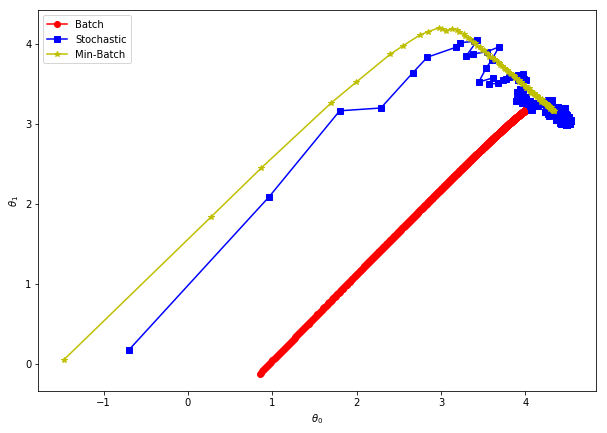

In [31]:
plt.figure(figsize=(10, 7))

plt.plot(thetas_gd[:, 0, 0], thetas_gd[:, 1, 0], 'r-o', label='Batch')
plt.plot(thetas_sgd[:, 0, 0], thetas_sgd[:, 1, 0], 'b-s', label='Stochastic')
plt.plot(thetas_mgd[:, 0, 0], thetas_mgd[:, 1, 0], 'y-*', label='Min-Batch')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.legend(loc='upper left')
plt.show()

## Polynomial Regression

Let's make a model that predicts values from this quadratic function
$$y = 0.5x^2 + x + 2 + Gaussian\hspace{0.1cm}noise$$

In [32]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

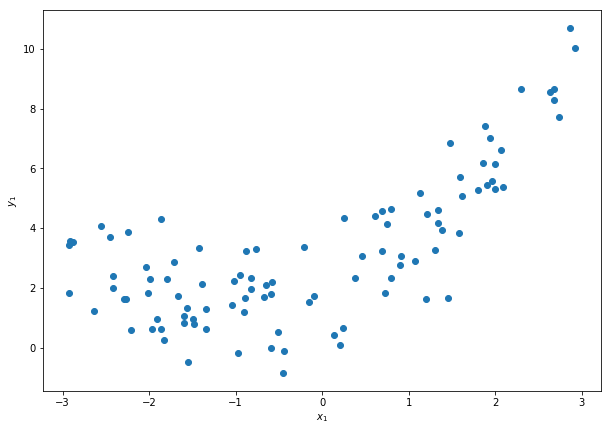

In [33]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')
plt.show()

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

(array([-1.70968791]), array([-1.70968791,  2.92303274]))

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89955643]), array([[1.09330418, 0.53349461]]))

True Equation: $y = 0.5x^2 + x + 2 + Gaussian\hspace{0.1cm}noise$

Model: $y = 0.486x^2 + 1.000x + 1.94$

In [36]:
X_new = np.expand_dims(np.arange(-3, 3, 0.1), 1)
X_poly_new = poly_features.transform(X_new)
y_predict = lin_reg.predict(X_poly_new)

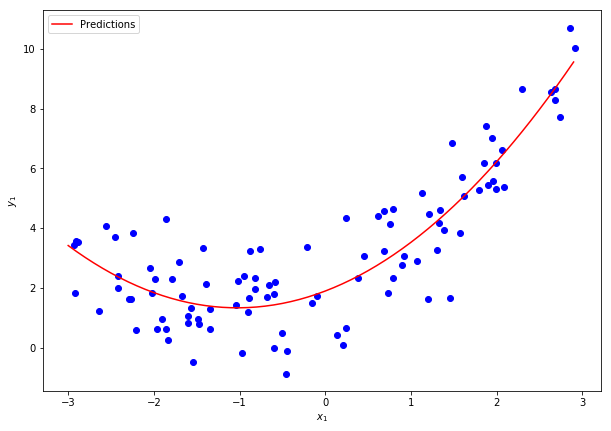

In [37]:
plt.figure(figsize=(10, 7))
plt.plot(X, y, 'bo')
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')
plt.legend(loc='upper left')
plt.show()

Note: If there were multiple features a, b, c and the degree of PolynomialFeatures is 3, then it will not only add the features $a^2$, $a^3$, $b^2$, $b^3$ but also the combinations $ab$, $a^2b$, $ab^2$.

***
> `PolynomialFeatures(degree=d)` transforms an array containing n features into an array containing $\frac{(n+d)!}{d!n!}$ features. Beware of the combinatorial explosion of the number of features!
***

## Learning Curves
Let's compare different degree curve fittings!!

In [38]:
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_300 = PolynomialFeatures(degree=300)

In [39]:
X_poly_2 = poly_features_2.fit_transform(X)
X_poly_300 = poly_features_300.fit_transform(X)

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler_300 = StandardScaler()

X_poly_300_scaled = scaler_300.fit_transform(X_poly_300)

lin_reg = LinearRegression()
lin_reg2 = LinearRegression()
lin_reg300 = LinearRegression()

lin_reg.fit(X, y)
lin_reg2.fit(X_poly_2, y)
lin_reg300.fit(X_poly_300_scaled, y)

y_pred = lin_reg.predict(X_new)
y_pred2 = lin_reg2.predict(poly_features_2.transform(X_new))
y_pred300 = lin_reg300.predict(scaler_300.transform(poly_features_300.transform(X_new)))

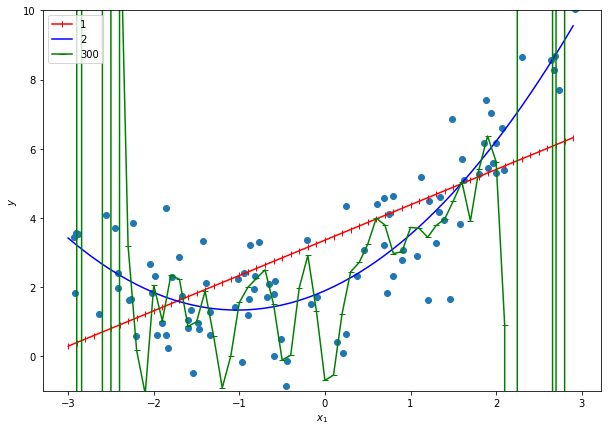

In [42]:
plt.figure(figsize=(10, 7))
plt.scatter(X, y)
plt.plot(X_new, y_pred, 'r-|', label='1')
plt.plot(X_new, y_pred2, 'b-', label='2')
plt.plot(X_new, y_pred300, 'g-_', label='300')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.ylim((-1, 10))
plt.legend(loc='upper left')
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-+', linewidth=3, label='val')
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE')
    plt.legend(loc='upper right')

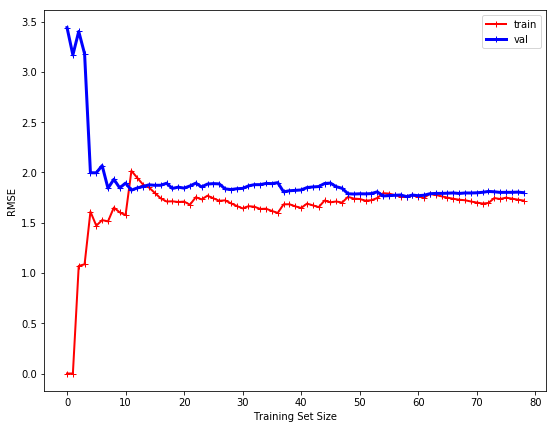

In [44]:
lin_reg = LinearRegression()

plt.figure(figsize=(9, 7))
plot_learning_curve(lin_reg, X, y)
plt.show()

Let's Compare this learning curve with a Polynomial Regression using degree 10

In [45]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

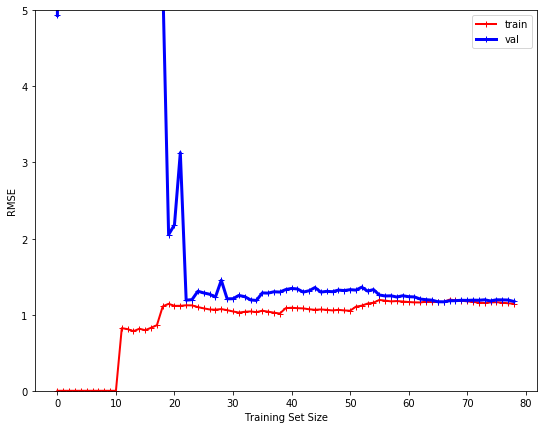

In [46]:
plt.figure(figsize=(9, 7))
plot_learning_curve(polynomial_regression, X, y)
plt.ylim([0, 5])
plt.show()

## Regularized Models

Here we will see various regularized models to reduce overfitting.

### Ridge Regression
The ridge regression basically is an extension of Linear Regression with a regularized cost function. Here we add $l_2$ norm of the weights (excluding bias term) to the cost function.

$$J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{j=1}^{n}\theta_j^2$$

It is necessary to perform scaling of the data before fitting a Ridge Regression model over it, as it is sensitive to the scale of the data.

In [47]:
from sklearn.linear_model import Ridge

The following is a helper function that takes X, y and alphas. Train Ridge Regression model with different alphas over X and y and then predicts over X_test. After which it plots the Ridge model. Since we will be scaling and using different degrees we will require 1D data for plotting so I added `X_plot` and `X_test_plot`. The seed is for consistency in colors of the plot.

In [48]:
markers = ['_', 'H', '.', 's', 'p',
           '2', 'v', 'h', '>', 'D',
           '|', ',', 'o', '^', 'd',
           '4', '8', '*', '<', '+',
           '3', '1']

In [49]:
def plot_ridge_regression(X, y, alphas, X_test=None, X_plot=None, X_test_plot=None, seed=42):
    if X_test is None:
        X_test = X
    if X_plot is None:
        X_plot = X
    if X_test_plot is None:
        X_test_plot = X_test

    np.random.seed(seed)
    plt.plot(X_plot, y, 'bo')

    for i, alpha in enumerate(alphas):
        ridge_reg = Ridge(alpha=alpha, solver="cholesky")

        ridge_reg.fit(X, y)
        y_hats = ridge_reg.predict(X_test)
        plt.plot(X_test_plot, y_hats, 
                 color=(np.random.rand(),np.random.rand(),np.random.rand()),
                 label='alpha={}'.format(alpha), marker=np.random.choice(markers))

    plt.legend(loc='upper left')

We will be comparing prediction over for a higher degree of freedom with lower one. We will also make sure that the data is scaled in case of higher degrees. Let's create our dataset for plots.

In [50]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
scaler = StandardScaler()
X_poly = poly_features.fit_transform(X)
X_poly_scaled = scaler.fit_transform(X_poly)
X_new_poly = poly_features.transform(X_new)
X_new_scaled = scaler.transform(X_new_poly)

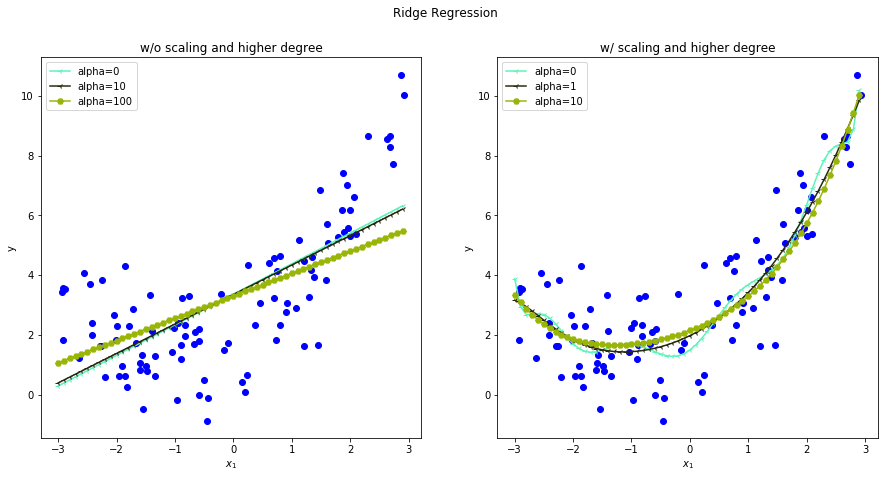

In [51]:
plt.figure(figsize=(15, 7))
plt.suptitle('Ridge Regression')

plt.subplot(121)
plt.title('w/o scaling and higher degree')
plot_ridge_regression(X, y, [0, 10, 100], X_new)
plt.xlabel('$x_1$')
plt.ylabel('y')

plt.subplot(122)
plt.title('w/ scaling and higher degree')
plot_ridge_regression(X_poly_scaled, y, [0, 1, 10], X_new_scaled, X, X_new)
plt.xlabel('$x_1$')
plt.ylabel('y')


plt.show()

We see that as alpha increases the curves in the plot decreases and thus showing reduce in overfitting.

We can perform ridge regression using simple `SGDRegressor`.

In [57]:
sgd_reg = SGDRegressor(penalty='l2') # give it a penalty of l2 norm
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([3.90589653])

In [58]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])

array([[4.8871403]])

### Lasso Regression
The lasso regression basically is an extension of Linear Regression with a regularized cost function. Here we add $l_1$ norm of the weights (excluding bias term) to the cost function.

$$J(\theta) = MSE(\theta) + \alpha\sum_{j=1}^{n}|\theta_j|$$

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features (i.e., set them to zero)

In [59]:
from sklearn.linear_model import Lasso

In [63]:
def plot_lasso_regression(X, y, alphas, X_test=None, X_plot=None, X_test_plot=None, seed=42):
    if X_test is None:
        X_test = X
    if X_plot is None:
        X_plot = X
    if X_test_plot is None:
        X_test_plot = X_test

    np.random.seed(seed)
    plt.plot(X_plot, y, 'bo')

    for i, alpha in enumerate(alphas):
        lasso_reg = Lasso(alpha=alpha, max_iter=2000)

        lasso_reg.fit(X, y)
        y_hats = lasso_reg.predict(X_test)
        plt.plot(X_test_plot, y_hats, 
                 color=(np.random.rand(),np.random.rand(),np.random.rand()),
                 label='alpha={}'.format(alpha), marker=np.random.choice(markers))

    plt.legend(loc='upper left')

c:\users\piyush\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
c:\users\piyush\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
c:\users\piyush\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


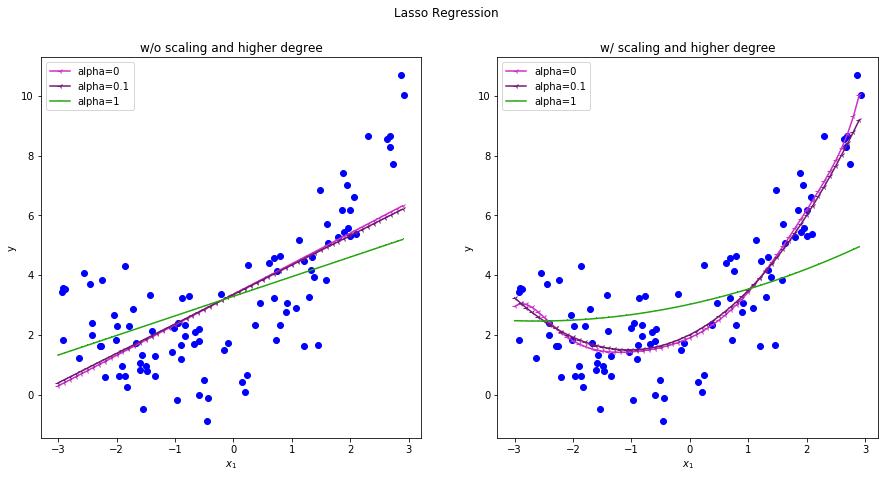

In [66]:
plt.figure(figsize=(15, 7))
plt.suptitle('Lasso Regression')

plt.subplot(121)
plt.title('w/o scaling and higher degree')
plot_lasso_regression(X, y, [0, 0.1, 1], X_new)
plt.xlabel('$x_1$')
plt.ylabel('y')

plt.subplot(122)
plt.title('w/ scaling and higher degree')
plot_lasso_regression(X_poly_scaled, y, [0, 0.1, 1], X_new_scaled, X, X_new)
plt.xlabel('$x_1$')
plt.ylabel('y')


plt.show()

The Lasso implementation of SKLearn package clearly states that alpha should not be equal to zero. And if we really want it to be zero, we should use LinearRegression. [see here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

This is the reason for the Warning encountered.

### Elastic Net
Mixture of both Lasso Regression and Elastic Regression

$$J(\theta) = MSE(\theta) + r\alpha \sum_{j=1}^{n}|\theta_j| + \frac{1-r}{2}\alpha \sum_{j=1}^{n}\theta_j^2$$

In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [67]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.83235347])

### Early Stopping

In [90]:
from copy import deepcopy

# prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()) ])

# Ready dataset
X_train, X_val, y_train, y_val = train_test_split(X, y)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

y_train = y_train[:, 0]
y_val = y_val[:, 0]

# warm_start=True means the SGD will start from previous stop points
sgd_reg = SGDRegressor(n_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")

train_errors = []
val_errors = []

best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    train_error = mean_squared_error(y_train_predict, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)

    train_errors.append(train_error)
    val_errors.append(val_error)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)
        print('Epoch: {}/{} train_error: {} val_error: {}'.format(epoch, 1000, train_error, val_error))

Epoch: 0/1000 train_error: 14.868293807271963 val_error: 11.148085702249576
Epoch: 1/1000 train_error: 13.480473933149957 val_error: 10.673453668403663
Epoch: 2/1000 train_error: 12.400355682403196 val_error: 10.111056716028312
Epoch: 3/1000 train_error: 11.564666480139763 val_error: 9.189439863327248
Epoch: 4/1000 train_error: 10.732607561234373 val_error: 8.8353011235502
Epoch: 7/1000 train_error: 8.734276946123794 val_error: 7.477578595806438
Epoch: 8/1000 train_error: 8.189719243203351 val_error: 6.959838512578133
Epoch: 9/1000 train_error: 7.727018882863297 val_error: 6.519849260384887
Epoch: 11/1000 train_error: 6.830261868260754 val_error: 5.74990155241877
Epoch: 12/1000 train_error: 6.38512806167778 val_error: 5.661398859587344
Epoch: 13/1000 train_error: 6.051588723068136 val_error: 5.218314477149712
Epoch: 15/1000 train_error: 5.505956576016456 val_error: 4.706149086858974
Epoch: 17/1000 train_error: 4.971827899918133 val_error: 4.285196051677771
Epoch: 18/1000 train_error: 4

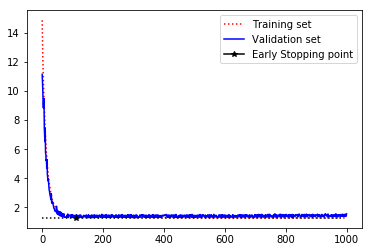

In [92]:
plt.figure(figsize=(6, 4))

plt.plot(train_errors, 'r', label='Training set', linestyle='dotted')
plt.plot(val_errors, 'b-', label='Validation set')

y_val_predict = best_model.predict(X_val_poly_scaled)
min_val_error = mean_squared_error(y_val_predict, y_val)
plt.plot([i for i in range(0, len(val_errors), 20)],
         [min_val_error for i in range(0, len(val_errors), 20)],
         color='black', linestyle='dotted')
plt.plot([best_epoch], [min_val_error], color='black', marker='*', label='Early Stopping point')

plt.legend(loc='upper right')
plt.show()

## Logistic Regression
Classification Algorithm. Estimates probability of an instance belonging to one class.

$$\hat{p} = h(\theta) = \sigma(\theta^T.X)$$

Here,

$$\sigma(-x) = \frac{1}{1 + e^{-x}}$$

$\sigma$ : The sigmoid function computes the probability.

Let's see its graph

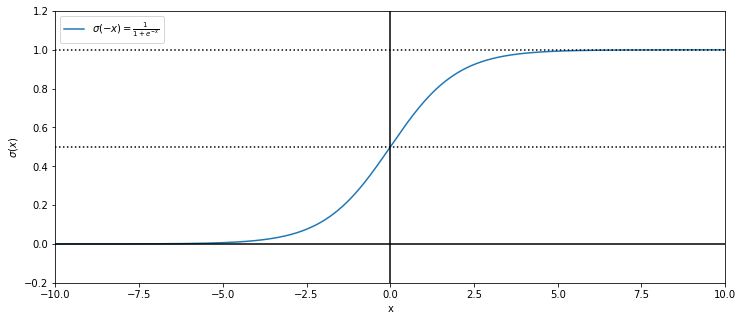

In [106]:
t = np.arange(-10, 10, 0.01)
sigma_t = 1 / (1 + np.exp(-t))

plt.figure(figsize=(12, 5))
plt.plot(t, sigma_t, label='$\\sigma(-x)=\\frac{1}{1 + e^{-x}}$')
plt.plot([-10, 10], [0.5, 0.5], color='black', linestyle='dotted')
plt.plot([-10, 10], [1.0, 1.0], color='black', linestyle='dotted')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.ylim([-0.2, 1.2])
plt.xlim([-10, 10])

plt.legend(loc='upper left')

plt.xlabel('x')
plt.ylabel('$\\sigma(x)$')

plt.show()

### Decision Boundaries
Let's test Logistic Regression over iris dataset.

In [107]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'DESCR', 'target_names', 'target', 'feature_names']

In [185]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [109]:
X.shape, y.shape

((150, 1), (150,))

In [187]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

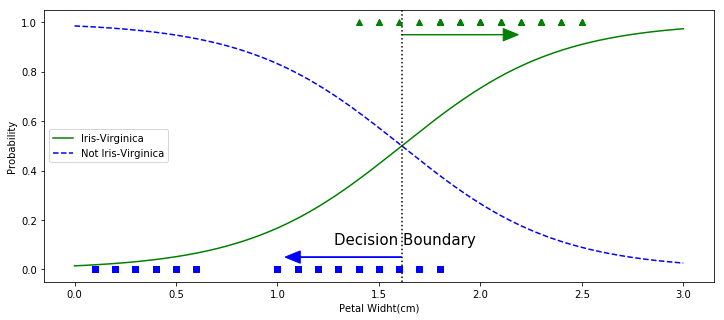

In [188]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plot_indices = np.random.permutation(np.arange(X.shape[0]))[:30]
X_plot_data = X[plot_indices]
y_plot_data = y[plot_indices]
y_plot_proba = log_reg.predict_proba(X_plot_data)

plt.figure(figsize=(12, 5))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

decision_boundary_x = X_new[np.abs(y_proba[:, 1] - y_proba[:, 0]) <= 1e-3, 0]
plt.axvline(decision_boundary_x, color='black', linestyle='dotted')

plt.text(1.28, 0.1, 'Decision Boundary', {'fontsize': 15})
plt.xlabel('Petal Widht(cm)')
plt.ylabel('Probability')
plt.legend(loc='center left')

plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

plt.arrow(decision_boundary_x, 0.05, -0.5, 0, color='blue', head_width=0.05)
plt.arrow(decision_boundary_x, 0.95, 0.5, 0, color='green', head_width=0.05)

plt.show()

**Decision Boundary ovet two features - Petal length and Petal Width**

In [194]:
X = iris["data"][:, 2:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

log_reg = LogisticRegression(C=10**10, random_state=42)

log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [196]:
log_reg.coef_, log_reg.intercept_

(array([[ 5.7528683 , 10.44455633]]), array([-45.26062435]))

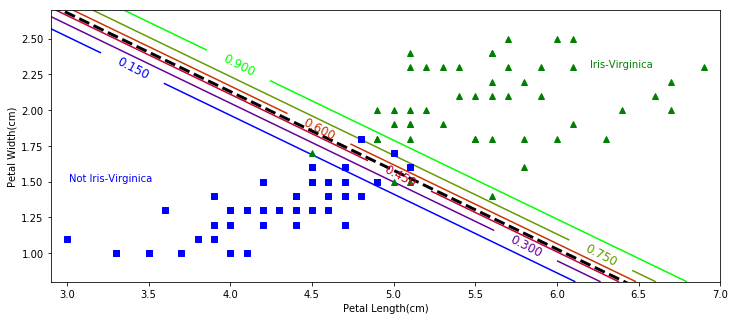

In [201]:
colors = ['blue', 'purple', 'yellow', 'red', 'cyan', 'green']

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(12, 5))

plt.plot(iris['data'][y==1, 2:3], iris['data'][y==1, 3:], 'g^')
plt.plot(iris['data'][y==0, 2:3], iris['data'][y==0, 3:], 'bs')

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)

plt.text(3.01, 1.5, 'Not Iris-Virginica', {'color': 'blue'})
plt.text(6.2, 2.3, 'Iris-Virginica', {'color': 'green'})

plt.xlim([2.9, 7])
plt.ylim([0.8, 2.7])

plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')

plt.legend(loc='center left')

plt.show()

In [202]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [203]:
softmax_reg.predict([[5, 2]])

array([2])

In [204]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134078e-07, 5.75276066e-02, 9.42471760e-01]])

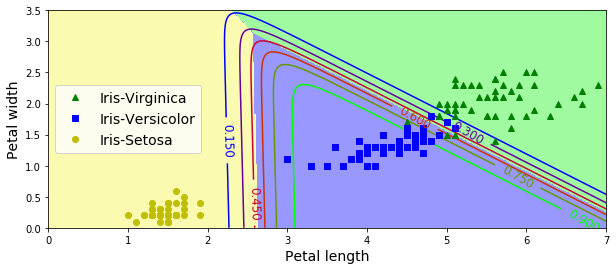

In [206]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()